In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import re
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_colwidth', 100)
df=pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....,positive
1,A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...,positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei off...",positive


In [3]:
df.shape

(50000, 2)

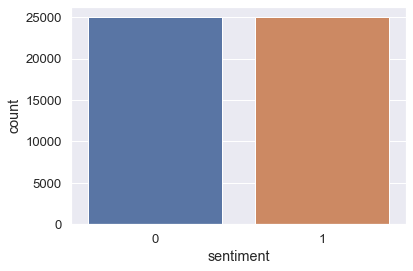

In [84]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.sentiment);

In [5]:
print("Positive sentiment lenght is {}". format(len(df[df.sentiment=="positive"])/len(df)))
print("Positive sentiment lenght is {}". format(len(df[df.sentiment=="negative"])/len(df)))

Positive sentiment lenght is 0.5
Positive sentiment lenght is 0.5


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.review.head(10)

0    One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....
1    A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...
2    I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...
3    Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...
4    Petter Mattei's "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei off...
5    Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...
6    I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...
7    This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...
8    Encouraged by the positive comments about this film on here I was looking forward to watching th...
9    If you like original gut wrenching laughter you wi

In [8]:
df["sentiment"]=pd.get_dummies(df["sentiment"], drop_first=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....,1
1,A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...,1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...",1
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...,0
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei off...",1


In [9]:
# Before tokenization, first apply re.sub() function to replace Synonym, antonym, meaning words

# Replace movie's synonyms
synonyms=[]
antonyms=[]

for syn in wordnet.synsets("movie"):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
            
print("Synonyms of movie:", synonyms)
print("Antonyms of movie:", antonyms)

Synonyms of movie: ['movie', 'film', 'picture', 'moving_picture', 'moving-picture_show', 'motion_picture', 'motion-picture_show', 'picture_show', 'pic', 'flick']
Antonyms of movie: []


In [10]:
def replace(words):
    words=re.sub(r" film ", "movie", words)
    words=re.sub(r" films ", "movie", words)
    words=re.sub(r" filming ", "movie", words)
    words=re.sub(r" movies ", "movie", words)
    words=re.sub(r"picture", "movie", words)
    words=re.sub(r"pic", "movie", words)
    words=re.sub(r"moving_picture", "movie", words)
    words=re.sub(r"moving-picture_show", "movie", words)
    words=re.sub(r"motion_picture", "movie", words)
    words=re.sub(r"motion_picture_show", "movie", words)
    words=re.sub(r"picture_show", "movie", words)
    words=re.sub(r"watching", "watch", words)
    words=re.sub(r"watched", "watch", words)
    words=re.sub(r"saw", "see", words)
    words=re.sub(r"seen", "see", words)
    words=re.sub(r"gone", "go", words)
    words=re.sub(r"went", "go", words)
    words=re.sub(r"wouldnt", "would not", words)
    words=re.sub(r"thismovieon", "this movie on", words)
    words=re.sub(r"stunningmovieto ", "stunning movie to", words)
    words=re.sub(r"Themovietechnique", "The movie technique", words)
    words=re.sub(r"couldnt", "could not", words)
    words=re.sub(r"<br /><br />", " ", words)
    words=re.sub(r"youre", "you",words)
    
    return str(words)

df["review"]=df["review"].apply(replace)

df["review"].head(10)

0    One of the other reviewers has mentioned that after watch just 1 Oz episode you'll be hooked. Th...
1    A wonderful little production.  The movie technique is very unassuming- very old-time-BBC fashio...
2    I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...
3    Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...
4    Petter Mattei's "Love in the Time of Money" is a visually stunning movie towatch. Mr. Mattei off...
5    Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a nobl...
6    I sure would like to see a resurrection of a up dated Seahunt series with the tech they have tod...
7    This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 o...
8    Encouraged by the positive comments about this movie on here I was looking forward to watch this...
9    If you like original gut wrenching laughter you wi

## Remove Punctuation

In [11]:
# Remove punctuation:

def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct

%time df["review"]=df["review"].apply(lambda x: remove_punct(x.lower()))

df.review.head(10)

Wall time: 5.63 s


0    one of the other reviewers has mentioned that after watch just 1 oz episode youll be hooked they...
1    a wonderful little production  the movie technique is very unassuming very oldtimebbc fashion an...
2    i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...
3    basically theres a family where a little boy jake thinks theres a zombie in his closet  his pare...
4    petter matteis love in the time of money is a visually stunning movie towatch mr mattei offers u...
5    probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble c...
6    i sure would like to see a resurrection of a up dated seahunt series with the tech they have tod...
7    this show was an amazing fresh  innovative idea in the 70s when it first aired the first 7 or 8 ...
8    encouraged by the positive comments about this movie on here i was looking forward to watch this...
9    if you like original gut wrenching laughter you wi

## Remove url, special characters

In [12]:
# Remove url and other characters

def remove_url(txt):
    text=" ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    return text

df["review"]=df["review"].apply(lambda x: remove_url(x))
df.review.head()

0    one of the other reviewers has mentioned that after watch just 1 oz episode youll be hooked they...
1    a wonderful little production the movie technique is very unassuming very oldtimebbc fashion and...
2    i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...
3    basically theres a family where a little boy jake thinks theres a zombie in his closet his paren...
4    petter matteis love in the time of money is a visually stunning movie towatch mr mattei offers u...
Name: review, dtype: object

In [13]:
# Remove numbers

df['review'] = df['review'].str.replace('\d','')

In [14]:
#Removing html strips

def remove_html(text):
    return BeautifulSoup(text, "lxml").text

df['review'] = df['review'].apply(lambda text: remove_html(text))

## Tokenization

In [15]:
import re

def tokenize(text):
    tokens=re.split('\W+', text)
    return tokens

%time df["review_tokenized"]=df["review"].apply(lambda x: tokenize(x))

df.head()

Wall time: 4.1 s


,review,sentiment,review_tokenized
0,one of the other reviewers has mentioned that after watch just oz episode youll be hooked they ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, oz, episode, youll, b..."
1,a wonderful little production the movie technique is very unassuming very oldtimebbc fashion and...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, oldtimebbc..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si..."
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his paren...,0,"[basically, theres, a, family, where, a, little, boy, jake, thinks, theres, a, zombie, in, his, ..."
4,petter matteis love in the time of money is a visually stunning movie towatch mr mattei offers u...,1,"[petter, matteis, love, in, the, time, of, money, is, a, visually, stunning, movie, towatch, mr,..."


## Remove Stopwords

In [16]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopword(tokenized_list):
    text= [word for word in tokenized_list if word not in stopword]
    return text

%time df["review_nostop"]=df["review_tokenized"].apply(lambda x: remove_stopword(x))

df.head()

Wall time: 15.7 s


,review,sentiment,review_tokenized,review_nostop
0,one of the other reviewers has mentioned that after watch just oz episode youll be hooked they ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, oz, episode, youll, b...","[one, reviewers, mentioned, watch, oz, episode, youll, hooked, right, exactly, happened, first, ..."
1,a wonderful little production the movie technique is very unassuming very oldtimebbc fashion and...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, oldtimebbc...","[wonderful, little, production, movie, technique, unassuming, oldtimebbc, fashion, gives, comfor..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,..."
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his paren...,0,"[basically, theres, a, family, where, a, little, boy, jake, thinks, theres, a, zombie, in, his, ...","[basically, theres, family, little, boy, jake, thinks, theres, zombie, closet, parents, fighting..."
4,petter matteis love in the time of money is a visually stunning movie towatch mr mattei offers u...,1,"[petter, matteis, love, in, the, time, of, money, is, a, visually, stunning, movie, towatch, mr,...","[petter, matteis, love, time, money, visually, stunning, movie, towatch, mr, mattei, offers, us,..."


## Lemmatization

In [17]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()


def lemmatizing(tokenized_test):
    text=[wn.lemmatize(word) for word in tokenized_test]
    return text

%time df["review_lemmatized"]=df["review_nostop"].apply(lambda x: lemmatizing(x))

df.head()

Wall time: 22.1 s


,review,sentiment,review_tokenized,review_nostop,review_lemmatized
0,one of the other reviewers has mentioned that after watch just oz episode youll be hooked they ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, oz, episode, youll, b...","[one, reviewers, mentioned, watch, oz, episode, youll, hooked, right, exactly, happened, first, ...","[one, reviewer, mentioned, watch, oz, episode, youll, hooked, right, exactly, happened, first, t..."
1,a wonderful little production the movie technique is very unassuming very oldtimebbc fashion and...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, oldtimebbc...","[wonderful, little, production, movie, technique, unassuming, oldtimebbc, fashion, gives, comfor...","[wonderful, little, production, movie, technique, unassuming, oldtimebbc, fashion, give, comfort..."
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,..."
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his paren...,0,"[basically, theres, a, family, where, a, little, boy, jake, thinks, theres, a, zombie, in, his, ...","[basically, theres, family, little, boy, jake, thinks, theres, zombie, closet, parents, fighting...","[basically, there, family, little, boy, jake, think, there, zombie, closet, parent, fighting, ti..."
4,petter matteis love in the time of money is a visually stunning movie towatch mr mattei offers u...,1,"[petter, matteis, love, in, the, time, of, money, is, a, visually, stunning, movie, towatch, mr,...","[petter, matteis, love, time, money, visually, stunning, movie, towatch, mr, mattei, offers, us,...","[petter, matteis, love, time, money, visually, stunning, movie, towatch, mr, mattei, offer, u, v..."


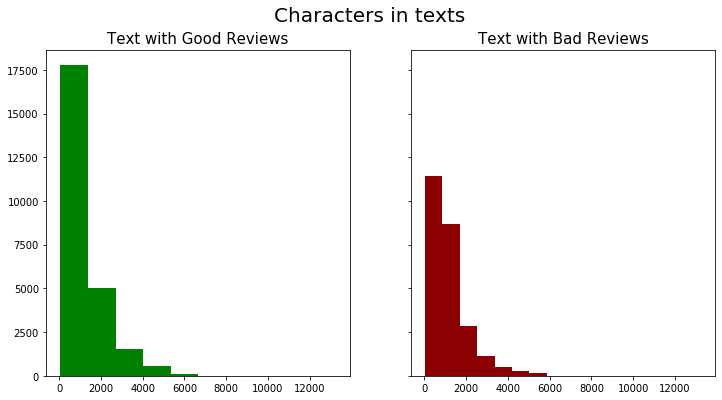

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6), sharey=True, sharex=True)

text_len=df[df['sentiment']==1]['review'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews', fontsize=15)

text_len=df[df['sentiment']==0]['review'].str.len()
ax2.hist(text_len,color='darkred')
ax2.set_title('Text with Bad Reviews', fontsize=15)

fig.suptitle('Characters in texts', fontsize=20)
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

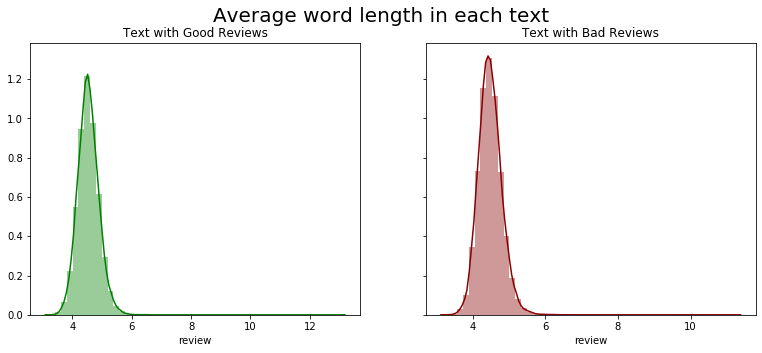

In [23]:
# Average word length in a text

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5), sharey=True)

word=df[df['sentiment']==1]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Text with Good Reviews',fontsize=12)

word=df[df['sentiment']==0]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='darkred')
ax2.set_title('Text with Bad Reviews',fontsize=12)
fig.suptitle('Average word length in each text', fontsize=20)

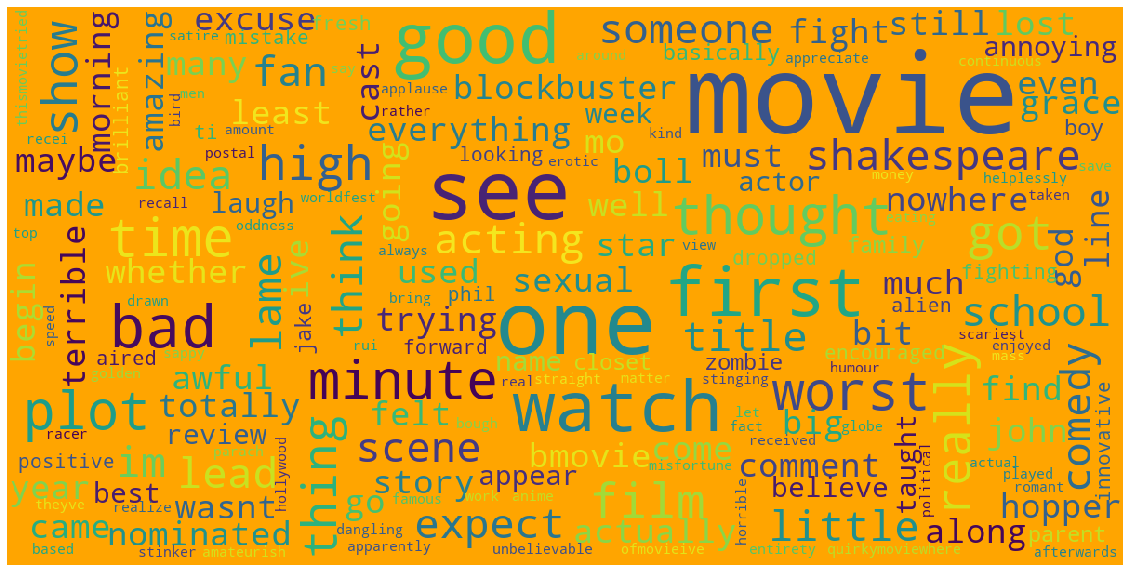

In [24]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='orange',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title="Negative Sentiment Reviews", fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df[df["sentiment"]==0]["review_lemmatized"])

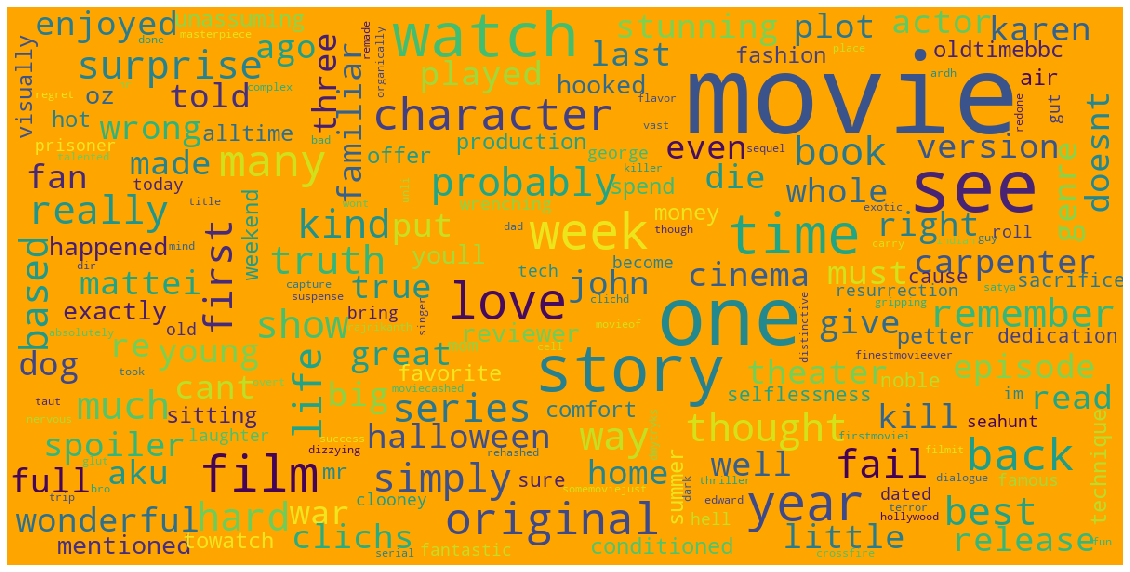

In [25]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='orange',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df[df["sentiment"]==1]["review_lemmatized"])

#### We should untokenize the "review_lemmatized" column to find how much there are the most common words

In [26]:
df['review_detoken']=df['review_lemmatized'].str.join(" ")

df.head(3)

,review,sentiment,review_tokenized,review_nostop,review_lemmatized,review_detoken
0,one of the other reviewers has mentioned that after watch just oz episode youll be hooked they ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, oz, episode, youll, b...","[one, reviewers, mentioned, watch, oz, episode, youll, hooked, right, exactly, happened, first, ...","[one, reviewer, mentioned, watch, oz, episode, youll, hooked, right, exactly, happened, first, t...",one reviewer mentioned watch oz episode youll hooked right exactly happened first thing struck o...
1,a wonderful little production the movie technique is very unassuming very oldtimebbc fashion and...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, oldtimebbc...","[wonderful, little, production, movie, technique, unassuming, oldtimebbc, fashion, gives, comfor...","[wonderful, little, production, movie, technique, unassuming, oldtimebbc, fashion, give, comfort...",wonderful little production movie technique unassuming oldtimebbc fashion give comforting someti...
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,...",thought wonderful way spend time hot summer weekend sitting air conditioned theater watch lighth...


In [27]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df["review_detoken"])
corpus[:10]

['one',
 'reviewer',
 'mentioned',
 'watch',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly']

In [28]:
from collections import Counter

counter = Counter(corpus)
most_common = counter.most_common(25)
most_common = dict(most_common)
most_common

{'movie': 94442,
 'one': 53667,
 'see': 42877,
 'like': 38364,
 'time': 30214,
 'good': 28549,
 'character': 27962,
 'film': 27923,
 'watch': 26893,
 'story': 24721,
 'even': 24439,
 'get': 24392,
 'would': 23618,
 'make': 23265,
 'really': 22805,
 'scene': 21072,
 'well': 19354,
 'much': 19062,
 'go': 18453,
 'people': 18188,
 'also': 17581,
 'bad': 17580,
 'great': 17504,
 'show': 16929,
 'way': 16915}

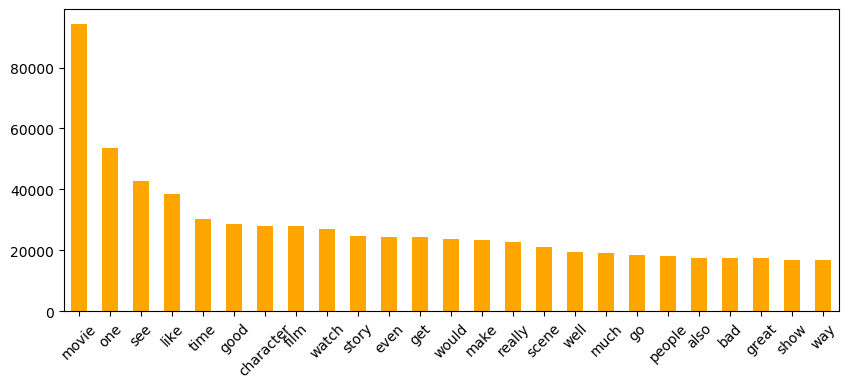

In [34]:
most_common=pd.Series(data=most_common)

plt.figure(figsize=(10,4), dpi=100)
most_common.plot(kind='bar', color="orange")
plt.xticks(rotation=45);

### To separate the adjacted words, we should use wordsegmentation library (Exp: "somemoviejust", "stunningmovieto")

In [33]:
! pip install wordsegment

In [34]:
import wordsegment

In [41]:
from wordsegment import segment,load

In [42]:
load()
segment('thisisatest')

['this', 'is', 'a', 'test']

## Vectorizing

In [36]:
df_copy=df.copy()

df_copy.head(3)

,review,sentiment,review_tokenized,review_nostop,review_lemmatized,review_detoken
0,one of the other reviewers has mentioned that after watch just oz episode youll be hooked they ...,1,"[one, of, the, other, reviewers, has, mentioned, that, after, watch, just, oz, episode, youll, b...","[one, reviewers, mentioned, watch, oz, episode, youll, hooked, right, exactly, happened, first, ...","[one, reviewer, mentioned, watch, oz, episode, youll, hooked, right, exactly, happened, first, t...",one reviewer mentioned watch oz episode youll hooked right exactly happened first thing struck o...
1,a wonderful little production the movie technique is very unassuming very oldtimebbc fashion and...,1,"[a, wonderful, little, production, the, movie, technique, is, very, unassuming, very, oldtimebbc...","[wonderful, little, production, movie, technique, unassuming, oldtimebbc, fashion, gives, comfor...","[wonderful, little, production, movie, technique, unassuming, oldtimebbc, fashion, give, comfort...",wonderful little production movie technique unassuming oldtimebbc fashion give comforting someti...
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...,1,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, si...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,...","[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater,...",thought wonderful way spend time hot summer weekend sitting air conditioned theater watch lighth...


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [44]:
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_,"\n")
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape,"\n")
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1} 

(1, 8) 

<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [60]:
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.","The dog.","The table fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_,"\n")
print(vectorizer.idf_,"\n")
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape,"\n")
print(vector.toarray())

{'the': 8, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1, 'table': 7} 

[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.69314718 1.        ] 

(1, 9) 

[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.         0.42983441]]


### Bag of Words for the model

In [75]:
X=df["review_detoken"]
Y=df["sentiment"]

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.20, random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40000,)
(10000,)
(40000,)
(10000,)


In [77]:
# It is used to convert text documents to numerical vectors or bag of words

cv=CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

# transformed train review
cv_train_reviews=cv.fit_transform(X_train)

# transformed test review
cv_test_reviews=cv.transform(X_test)

print("Bag of words train:", cv_train_reviews.shape)
print("Bag of words test:", cv_test_reviews.shape)

Bag of words train: (40000, 6334469)
Bag of words test: (10000, 6334469)


### TfidfVectorizer

In [79]:
# TfidfVectorizer

tv=TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))

# transformed train reviews
tv_train_reviews=tv.fit_transform(X_train)

# transformed test reviews
tv_test_reviews=tv.transform(X_test)

print("Tfidf_train:", tv_train_reviews.shape)
print("Tfidf_test:", tv_test_reviews.shape)

Tfidf_train: (40000, 6334469)
Tfidf_test: (10000, 6334469)


## Logistic Regression

In [83]:
log = LogisticRegression(penalty="l2", random_state=42)

log.fit(cv_train_reviews,Y_train)
pred_log_bow=log.predict(cv_test_reviews)

print("Accuracy of logistic regression for bag of words:", accuracy_score(Y_test,pred_log_bow),"\n")
print("Classification report:","\n", classification_report(Y_test,pred_log_bow))

Accuracy of logistic regression for bag of words: 0.5843 

Classification report: 
               precision    recall  f1-score   support

           0       0.54      0.99      0.70      4961
           1       0.93      0.19      0.31      5039

    accuracy                           0.58     10000
   macro avg       0.74      0.59      0.51     10000
weighted avg       0.74      0.58      0.51     10000

